# Q2
### Train a machine learning model using the training file to predict the values of the ‘tat_in_days’ column for the test file. ( Evaluation on the basis on RMSE score)

#### By: Harsh Sagar Garg

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('problem_2_train.csv')

# Analyzing the dataset

In [3]:
data.head()

,srno,mobmake,hubid,hubpincode,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincodecategory,claimtype,custpincode,memcreateddate,mobilepurchasedate,claimintdate,servicecntrid,pickupStartdate,tat_in_days
0,2851218,AN,7,500004,233,233,131,A,ADLD,500001,2017-04-27,2016-12-02,2018-02-08,4403,2018-02-13,5
1,2838330,AJ,10,226010,233,233,131,A,ADLD,226022,2017-03-06,2017-03-05,2018-02-04,4444,2018-02-08,12
2,2835781,AJ,2,110018,233,233,228,A,ADLD,110018,2018-02-01,2018-01-27,2018-02-03,4388,2018-02-12,9
3,2838589,AM,2,110018,233,233,228,B,ADLD,124001,2018-01-17,2018-01-31,2018-02-04,4092,2018-02-14,9
4,2855214,AN,21,110015,233,233,131,A,ADLD,201301,2018-01-23,2018-01-20,2018-02-09,4580,2018-02-14,8


In [4]:
data.isnull().values.any()

False

In [5]:
data.describe()

,srno,hubid,hubpincode,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincode,servicecntrid,tat_in_days
count,6.250000e+03,6250.000000,6250.000000,6250.000000,6250.000000,6250.000000,6250.000000,6250.000000,6250.000000
mean,2.946134e+06,11.732000,340546.139840,232.654400,231.495360,155.040480,366009.473440,4457.158080,12.730400
std,7.733480e+04,9.141463,213449.097822,30.471658,22.521945,41.883918,210990.167946,200.945634,5.075533
min,2.818359e+06,0.000000,0.000000,0.000000,0.000000,131.000000,0.000000,4008.000000,2.000000
25%,2.877226e+06,3.000000,110018.000000,233.000000,233.000000,131.000000,135034.000000,4398.000000,9.000000
50%,2.944426e+06,8.000000,400001.000000,233.000000,233.000000,131.000000,395001.500000,4474.000000,12.000000
75%,3.012237e+06,21.000000,500004.000000,233.000000,233.000000,131.000000,560016.000000,4580.000000,15.000000
max,3.101035e+06,27.000000,800001.000000,308.000000,245.000000,228.000000,855107.000000,5146.000000,57.000000


In [6]:
data.dtypes

srno                    int64
mobmake                object
hubid                   int64
hubpincode              int64
pickuppartnerid         int64
deliverypartnerid       int64
insuranceCompanyId      int64
custpincodecategory    object
claimtype              object
custpincode             int64
memcreateddate         object
mobilepurchasedate     object
claimintdate           object
servicecntrid           int64
pickupStartdate        object
tat_in_days             int64
dtype: object

### Converting the date Columns

In [7]:
data["memcreateddate"]= pd.to_datetime(data["memcreateddate"]) 

In [8]:
data["mobilepurchasedate"]= pd.to_datetime(data["mobilepurchasedate"]) 

In [9]:
data.claimintdate = data.claimintdate.map(lambda x:x+" 00:00:00")
data.claimintdate = pd.to_datetime(data.claimintdate).astype('int64')

data.pickupStartdate = data.pickupStartdate.map(lambda x:x+" 00:00:00")
data.pickupStartdate = pd.to_datetime(data.pickupStartdate).astype('int64')

In [10]:
data.head()

,srno,mobmake,hubid,hubpincode,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincodecategory,claimtype,custpincode,memcreateddate,mobilepurchasedate,claimintdate,servicecntrid,pickupStartdate,tat_in_days
0,2851218,AN,7,500004,233,233,131,A,ADLD,500001,2017-04-27,2016-12-02,1518048000000000000,4403,1518480000000000000,5
1,2838330,AJ,10,226010,233,233,131,A,ADLD,226022,2017-03-06,2017-03-05,1517702400000000000,4444,1518048000000000000,12
2,2835781,AJ,2,110018,233,233,228,A,ADLD,110018,2018-02-01,2018-01-27,1517616000000000000,4388,1518393600000000000,9
3,2838589,AM,2,110018,233,233,228,B,ADLD,124001,2018-01-17,2018-01-31,1517702400000000000,4092,1518566400000000000,9
4,2855214,AN,21,110015,233,233,131,A,ADLD,201301,2018-01-23,2018-01-20,1518134400000000000,4580,1518566400000000000,8


## Handling the Catagorical Data

In [11]:
data['mobmake'] = pd.factorize(data.mobmake)[0]

In [12]:
data['claimtype'] = pd.factorize(data.claimtype)[0]

In [13]:
data['custpincodecategory'] = pd.factorize(data.custpincodecategory)[0]


In [14]:
data.head()

,srno,mobmake,hubid,hubpincode,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincodecategory,claimtype,custpincode,memcreateddate,mobilepurchasedate,claimintdate,servicecntrid,pickupStartdate,tat_in_days
0,2851218,0,7,500004,233,233,131,0,0,500001,2017-04-27,2016-12-02,1518048000000000000,4403,1518480000000000000,5
1,2838330,1,10,226010,233,233,131,0,0,226022,2017-03-06,2017-03-05,1517702400000000000,4444,1518048000000000000,12
2,2835781,1,2,110018,233,233,228,0,0,110018,2018-02-01,2018-01-27,1517616000000000000,4388,1518393600000000000,9
3,2838589,2,2,110018,233,233,228,1,0,124001,2018-01-17,2018-01-31,1517702400000000000,4092,1518566400000000000,9
4,2855214,0,21,110015,233,233,131,0,0,201301,2018-01-23,2018-01-20,1518134400000000000,4580,1518566400000000000,8


In [15]:
feature_cols = ['mobmake',
 'hubid',
 'pickuppartnerid',
 'deliverypartnerid',
 'insuranceCompanyId',
 'custpincodecategory',
 'claimtype',
 'custpincode',
 'claimintdate',
 'servicecntrid',
 'pickupStartdate']

In [16]:
X= data[feature_cols]

print(X.shape)

(6250, 11)


In [17]:
y= data['tat_in_days']

## Drawing Heat Map for visualizing relations between parameters

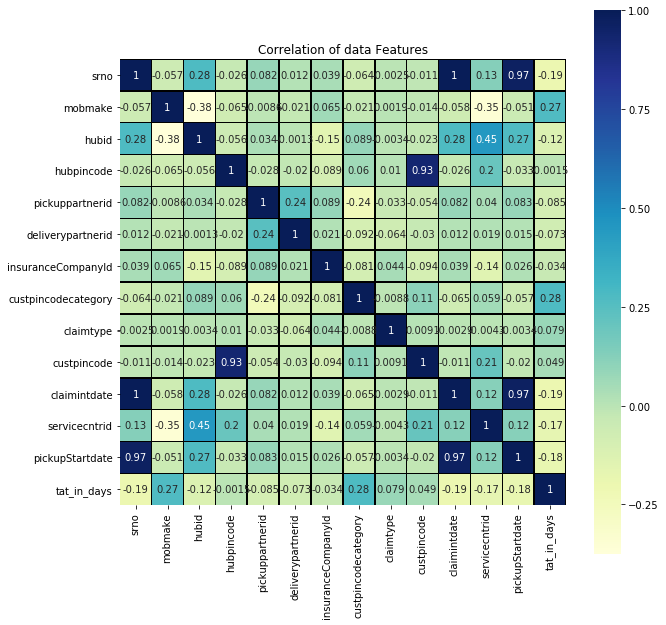

In [18]:
import seaborn as sns

plt.subplots(figsize=(10,10))
sns.heatmap(data.corr(),linewidths=0.5,linecolor='black',vmax=1.0,square=True,cmap="YlGnBu",annot=True)
plt.title('Correlation of data Features')
plt.show()


### Removing the Columns which hardly change, that is, whose variance is less

In [21]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(.2 * (1 - .2)))
sel.fit_transform(X)
print(X)

      mobmake  hubid  pickuppartnerid  deliverypartnerid  insuranceCompanyId  \
0           0      7              233                233                 131   
1           1     10              233                233                 131   
2           1      2              233                233                 228   
3           2      2              233                233                 228   
4           0     21              233                233                 131   
5           0     21              233                233                 131   
6           3      2              233                233                 131   
7           3      6              233                233                 131   
8           0      3              201                233                 131   
9           1      5              233                233                 131   
10          0      3              233                233                 131   
11          0     22              233   

## Dividing data for train and test

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [25]:
print(X.shape)
print(y.shape)

(6250, 11)
(6250,)


# REGRESSION ALGORITHMS

## LINEAR REGRESSION

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
## Step:1 Create the Object
lr = LinearRegression(normalize = True)
print(lr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)


In [28]:
## Step 2: Training The Model
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [29]:
## You can output parameter
print(lr.coef_)
print(lr.intercept_)

[ 2.57861263e-01  1.87056787e-02  1.22577070e-03 -5.19137435e-03
 -2.74561191e-03  1.42745795e+00  1.73710126e+01  7.70953205e-07
 -8.15311858e-16 -2.53703519e-03  3.64023130e-16]
709.2136278243175


In [30]:
list(zip(feature_cols,lr.coef_))

[('mobmake', 0.2578612627880384),
 ('hubid', 0.01870567873670493),
 ('pickuppartnerid', 0.0012257706958244891),
 ('deliverypartnerid', -0.005191374349462003),
 ('insuranceCompanyId', -0.00274561191337499),
 ('custpincodecategory', 1.427457948670518),
 ('claimtype', 17.371012646673744),
 ('custpincode', 7.709532048276148e-07),
 ('claimintdate', -8.153118580441247e-16),
 ('servicecntrid', -0.002537035187428785),
 ('pickupStartdate', 3.640231303858901e-16)]

In [31]:
y_pred = lr.predict(X_test)

In [32]:
## RMSE FOR LINEAR REG
np.sqrt(np.mean(np.square(y_pred-y_test))) 

4.917742720446431

## RIDGE REGRESSION

In [33]:
from sklearn.linear_model import Ridge
rr = Ridge(alpha=100)
rr.fit(X_train,y_train)

/home/hsg/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number3.198345e-33
  overwrite_a=True).T


Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [34]:
y_pred = rr.predict(X_test)

In [35]:
## RMSE
np.sqrt(np.mean(np.square(y_pred-y_test))) 

4.924253873001534

## LASSO REGRESSION

In [36]:
from sklearn.linear_model import Lasso

In [37]:
lasso = Lasso()
lasso.fit(X_train,y_train)

/home/hsg/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [38]:
y_pred = lasso.predict(X_test)

In [39]:
## RMSE
np.sqrt(np.mean(np.square(y_pred-y_test)))

5.088479045224957

## ELASTIC NET REGRESSION

In [40]:
from sklearn.linear_model import ElasticNet
alpha = 0.001
enet = ElasticNet(alpha=alpha, l1_ratio=0.5)


#### Tested different values of alpha and found out this to be most suitable^

In [41]:
enet.fit(X_train, y_train)
y_pred = enet.predict(X_test)

/home/hsg/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [42]:
### RMSE
np.sqrt(np.mean(np.square(y_pred-y_test)))

4.9148838479143535

## support vector regression : svr

In [43]:
from sklearn import svm
clf = svm.SVR()
clf.fit(X, y) 

/home/hsg/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [44]:
y_pred = clf.predict(X_test)

In [45]:
np.sqrt(np.mean(np.square(y_pred-y_test)))

4.980683551472747

## Bagging Regressor

In [46]:
from sklearn.ensemble import BaggingRegressor
from sklearn import svm
from sklearn.linear_model import Ridge

#### Applying Bagging Regressor by taking Ridge Regressor as the base function, since it gave relatively less Error

In [47]:

estimator =  BaggingRegressor(Ridge(),max_features=4,max_samples=5000)
estimator.fit(X_train, y_train.values.ravel())
y_pred = estimator.predict(X_test)

/home/hsg/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number3.087545e-30
  overwrite_a=True).T
/home/hsg/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number6.152639e-35
  overwrite_a=True).T
/home/hsg/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.135222e-28
  overwrite_a=True).T
/home/hsg/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.046722e-28
  overwrit

In [48]:
#### RMSE
np.sqrt(np.mean(np.square(y_pred-y_test)))

5.249508589629133

## GRADIENT BOOST REGRESSION ALGORITHM

In [49]:
from sklearn.ensemble import GradientBoostingRegressor

In [50]:
grad = GradientBoostingRegressor(n_estimators=600)

In [51]:
grad.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=600, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [52]:
y_pred = grad.predict(X_test)

In [53]:
## RMSE Value
np.sqrt(np.mean(np.square(y_pred-y_test)))

4.515546025923398

#### Ran the above algo foo n_estimators = 400,500,600,650,700. 600 gave the better value

## Since Gradient Boost has the least RMSE VALUE among the above tried Algorithms, We will use it 

In [54]:
datat = pd.read_csv('problem_2_test.csv')

In [55]:
datat["memcreateddate"]= pd.to_datetime(datat["memcreateddate"]) 

In [56]:
datat["mobilepurchasedate"]= pd.to_datetime(datat["mobilepurchasedate"]) 

In [57]:
datat.claimintdate = datat.claimintdate.map(lambda x:x+" 00:00:00")
datat.claimintdate = pd.to_datetime(datat.claimintdate).astype('int64')

datat.pickupStartdate = datat.pickupStartdate.map(lambda x:x+" 00:00:00")
datat.pickupStartdate = pd.to_datetime(datat.pickupStartdate).astype('int64')

In [58]:
datat['mobmake'] = pd.factorize(datat.mobmake)[0]

In [59]:
datat['claimtype'] = pd.factorize(datat.claimtype)[0]

In [60]:
datat['custpincodecategory'] = pd.factorize(datat.custpincodecategory)[0]

In [61]:
feature_cols1 = ['mobmake',
 'hubid',
 'pickuppartnerid',
 'deliverypartnerid',
 'insuranceCompanyId',
 'custpincodecategory',
 'claimtype',
 'custpincode',
 'claimintdate',
 'servicecntrid',
 'pickupStartdate']

In [62]:
tX = datat[feature_cols1]

In [63]:
ans = grad.predict(tX)

In [64]:
type(ans)

numpy.ndarray

In [65]:
resultFile2 = pd.DataFrame({'predictions':ans})

In [66]:
resultFile2.head()

,predictions
0,11.123375
1,11.669591
2,11.609583
3,13.989221
4,17.394503


In [67]:
resultFile2.to_csv('predictions2.csv')

#### Also tried other Algorithms like AdaBoost, other ensemble Algos, but the RMSE Was very High